<a href="http://landlab.github.io"><img style="float: left" src="../../../landlab_header.png"></a>

# Stream power, linear diffusion, channel steepness, and relief 
This notebook was created by Nicole Gasparini at Tulane University.

<hr>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

**What is this notebook?**

This notebook illustrates the evolution of detachment-limited channels in an actively uplifting landscape. The landscape evolves according to the equation:

\begin{equation}
 \frac{d z}{d t} = U - K_\text{sp} A^{m_{sp}} S^{n_{sp}} + \nabla q_s
\end{equation}

Here the first term on the right hand side is rock uplift, the second term is fluvial incision, and the third term in erosion/deposition due to hillslope processes.

In the fluvial incision term, $K_{sp}$ is the erodibility coefficient, which is thought to be positively correlated with climate wetness, or storminess (this is hard to quantify) and to be negatively correlated with rock strength (again, rock strength is hard to quantify). $m_{sp}$ and $n_{sp}$ are positive exponents, usually thought to have a ratio, $m_{sp}/n_{sp} \approx 0.5$. $A$ is drainage area and $S$ is the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation. (If slope is negative there is no fluvial erosion.) The fluvial erosion term is also known as the stream power equation.

The hillslope sediment transport equation here is described using linear diffusion :
\begin{equation}
q_s = -D \nabla z
\end{equation}
where ${q}_s$ is the transport rate with dimensions of L$^2$T$^{-1}$;  $D$ is a transport coefficient (or diffusivity) with dimensions of L$^2$T$^{-1}$; and $z$ is elevation. $\nabla z$ is the gradient in elevation. If distance is increasing downslope, $\nabla z$ is negative downslope, hence the negative in front of $D$.

You should know the term **drainage density** ($Den$) for this exercise.
\begin{equation}
Den = \frac{\sum l}{A}
\end{equation}

Where $l$ is a length of channel, and $\sum l$ is the length of all channels in the watershed of interest, and $A$ is the drainage area of the watershed of interest. In other words, more length of channels over the same area means a higher drainage density (that should make sense!). 

To calculate drainage density (which we won't do here), one would need to know where the transition from hillslope to channel happens on a landscape. This is oddly hard. One tool that can be used to determine where channels begin is the slope-area plot. At the smallest drainage area are hillslopes. As drainage area increases on a hillslope (moving down the hillslope), the slope increases. This is seen as a positive trend in a slope-area plot. At some drainage area, the slope starts to decrease. At this **critical drainage area**, where the slope-area plot goes from an increasing, positive trend to a decreasing, negative trend, is where the landscape switches from hillslope to channel. The larger the critical drainage area, the longer the hillslopes, the smaller the drainage density.

**What will you do?**

In this exercise you will modify the code to get a better understanding of what sets the relief in a watershed. You will be asked to change the diffusivity and fluvial erodibilty to create watersheds with different drainage densities and explore how relief changes.

Start at the top by reading each block of text and sequentially running each code block (shift - enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

If you just change one code block and rerun only that code block, only the parts of the code in that code block will be updated. (E.g. if you change parameters but don't reset the code blocks that initialize run time or topography, then these values will not be reset.) 

After running every code block once, has the landscape reached steady state? Answer: NO! How do you know? After you think about this, you are ready to complete this project.

Answer the following questions using the code above and below. All answers and supporting figures (produced using the code) should be embedded in a powerpoint that you hand in. Code Blocks 8-12 produce different figures that you may find useful. You can use any or all of these different figures to help you with the questions below. (Download or screenshoot the figures.) 

Please complete the following tasks. Make sure your write in full sentences and proofread the document that you hand in.

1. Using the parameters provided in the initial notebook, run the landscape to steady state. (Note that you can keep running the main evolution loop - Code Block 7 - and the different plotting blocks without running the code blocks above them.) [These landscapes may not reach a perfect steady state. Close is fine.] When the landscape reaches steady state, record the channel steepness, $k_{sn}$, (only applies for the channelized part of the landscape), the average slope of the entire watershed, and the total relief (in this case the minimum elevation is zero, so the total relief is just the maximum elevation). Also note the approximate critical drainage area. (See the description at the top of this notebook if you don't know that term.) Save some illustrative plots. This example has a relatively small critical drainage area/large drainage density. (10 pts)

2. Rerun the notebook with a new diffusivity value, but keep all other parameters the same (so do not change the fluvial erodibility or rock uplift value). You should find a scenario with a critical drainage area higher than the initial value, but less than 1e6 m$^2$. Run to steady state, and record the critical drainage area, channel steepness index, average slope, and total relief. Make sure you also record the diffusivity value used. Save some illustrative plots. (10 pts)

3. Repeat step 2. So same everything except use a third, different diffusivity value. This example should have a different critical drainage from the previous two landscapes, and the critical drainage area should be less than 1e6 m$^2$. (10 pts)

3. Now repeat steps 1, 2, and 3, two more times. I want you to choose two different fluvial erodibility values (both should be smaller than the original value of $K_{sp} = 1E-5$, i.e. they should produce larger $k_{sn}$ values). For each $K_{sp}$ value, you should produce three landscapes with three different diffusivity values. Try to keep all slope values (on hillslopes and channels) less than 1 m/m. Try to keep the critical drainage area less than 1e6 m$^2$. Record critical drainage area, channel steepness index, average slope, and total relief for all the landscapes. (20 pts)

4. You should have produced a total of 9 steady-state landscapes, using three different fluvial erodibility values, and at least three different diffusivity values. In all cases, the uplift rate remained the same, so the erosion rate remained the same. What trends do you notice about controls on relief, average slope, and channel steepness index? Is relief related to critical drainage area? Is it related to channel steepness index? Average slope? Can you summarize (in 5 sentences or less) some things you have learned about rivers and fluvial erodbility, hillslopes and diffusivity, and topographic trends? (15 pts)

5. Thought question ... If you had a larger watershed, do you think that would impact any of the trends (or lack of trends) that you observed? Please explain in 5 sentences or less. (5 pts)

Below is a detailed explanation based on landscape evolution theory and related studies:

---

### Expected Effects of Increasing Diffusivity

When you increase the diffusivity in your model, you are essentially enhancing the hillslope processes that smooth out elevation differences. This leads to changes in several topographic metrics:

1. **Steepness (Channel Steepness Index)**  
   - **Expected Change:** A decrease in steepness.  
   - **Explanation:** Higher diffusivity increases the efficiency of mass wasting and other diffusive processes. The increased smoothing effectively reduces the incision of channels, so the slopes within channels become less steep. This can be expressed mathematically because the channel steepness index often scales with the ratio of fluvial incision efficiency (such as $K_{sp}$) to the diffusivity $D$ (e.g., $\text{steepness} \sim \left(K_{sp}/D\right)^{1/m}$). Increasing $D$ will decrease that ratio, thereby lowering the steepness.

2. **Total Relief**  
   - **Expected Change:** A reduction in total relief.  
   - **Explanation:** Total relief is the difference between the highest and lowest elevations in your landscape. When diffusivity is increased, elevation gradients are smoothed more effectively over time. As a result, the maximum elevations are lowered (and valleys can be filled in more), leading to a reduction in overall relief.

3. **Average Slope**  
   - **Expected Change:** A decrease in the average slope.  
   - **Explanation:** Enhanced diffusive processes reduce the overall slope of the landscape. Since hillslope diffusion acts to erase sharp gradients, the mean slope across the landscape—including both hills and channels—tends to drop as the diffusivity increases.

4. **Critical Drainage Area**  
   - **Expected Change:** An increase in the critical drainage area.  
   - **Explanation:** The concept of critical drainage area typically refers to the threshold area needed for fluvial processes to dominate over hillslope diffusion and initiate channel incision. With higher diffusivity, hillslope processes become more effective at smoothing topography, which means that a larger contributing area is needed for water flow to have enough power to overcome the diffusive smoothing effect. In other words, channels are only incised where there is a sufficiently large drainage area. The threshold drainage area for channel initiation thus shifts to higher values when diffusivity is increased.

---

### Summary

- **Steepness (Channel Steepness Index):** Decreases with higher diffusivity.  
- **Total Relief:** Decreases due to more effective smoothing of elevation differences.  
- **Average Slope:** Decreases because overall gradients are reduced.  
- **Critical Drainage Area:** Increases as a larger contributing area is required for channels to form against the background smoothing by diffusion.

These predictions are consistent with both theoretical derivations and numerical experiments in landscape evolution models. For more detailed insights, you may refer to literature on landscape evolution dynamics (e.g., works on stream power incision coupled with linear diffusion) which confirm that the balance between diffusive and erosional processes is crucial in setting these geomorphic metrics. 

If you need further assistance or clarifications on how to implement changes in your code, feel free to ask!

For D = 0.5


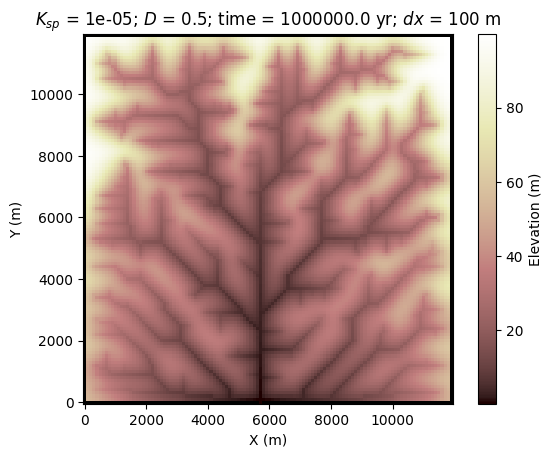

Maximum elevation is: 99.84046557087471


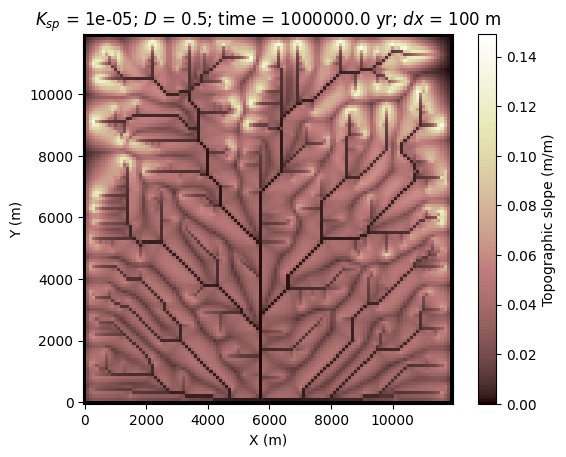

Mean slope is: 0.03952898082472683


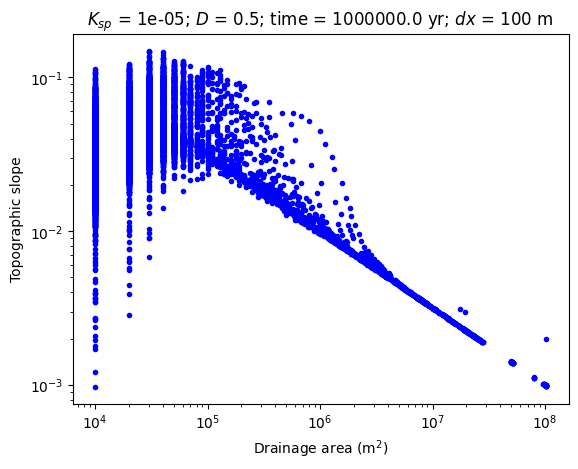

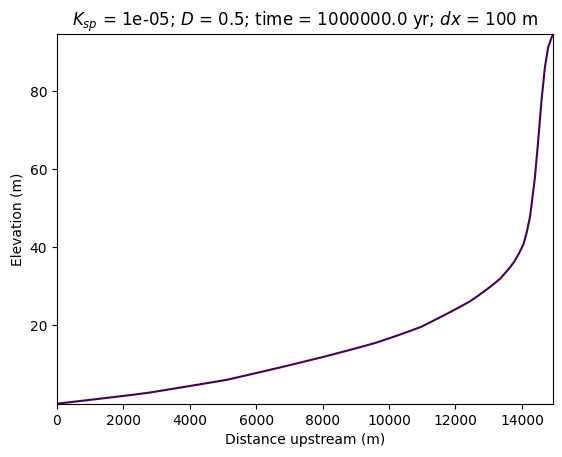

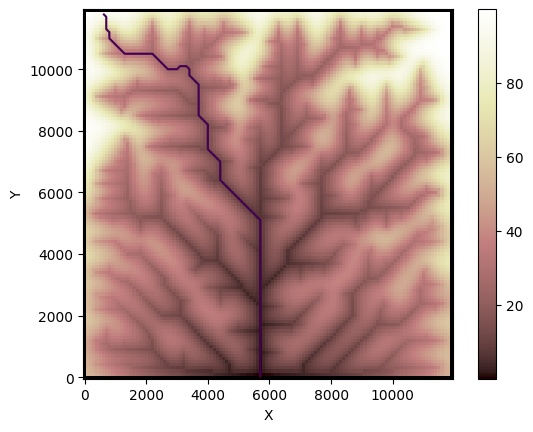

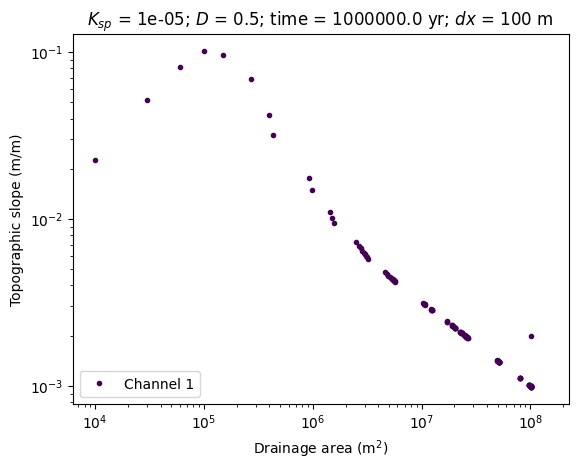

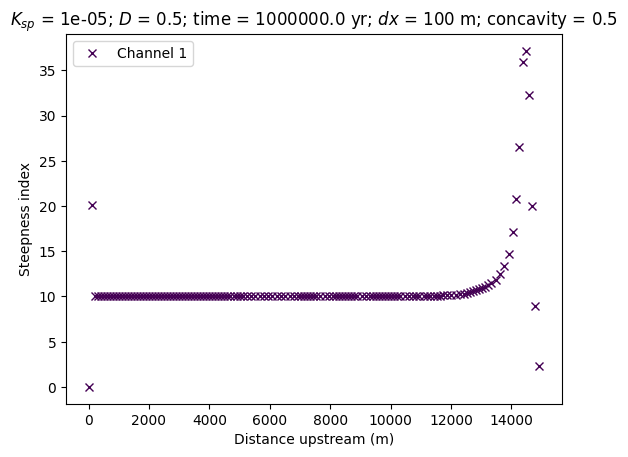

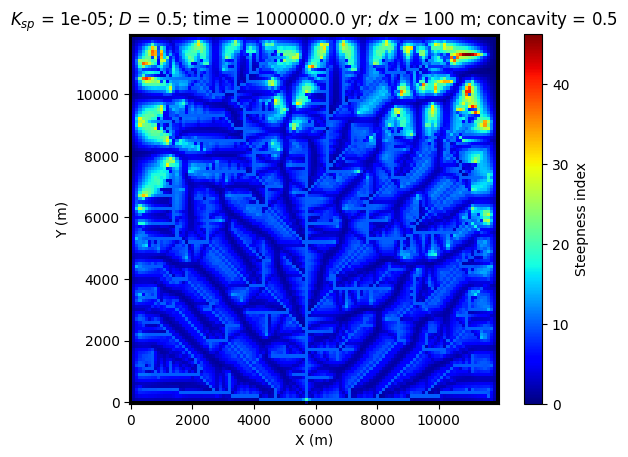

Diffusivity used: 0.5 m²/yr
Average slope: 0.0395
Total relief: 99.84 m
Mean channel steepness index: 7.40
Critical drainage area is 100000.0 m2


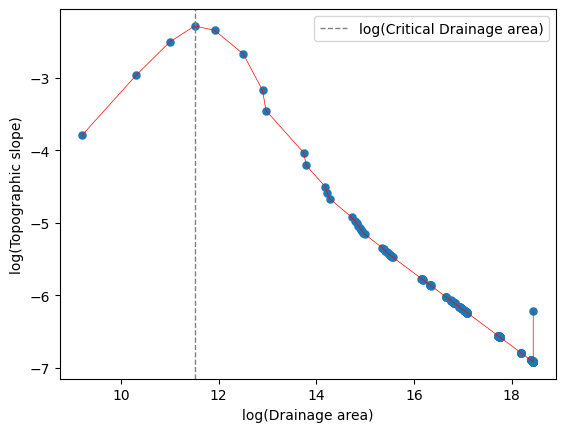

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from landlab import RasterModelGrid, imshow_grid
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    FlowAccumulator,
    SteepnessFinder,
    StreamPowerEroder,
    LinearDiffuser,
)
from landlab.io import write_esri_ascii

def wrapper(D = 0.5,K_sp = 1.0e-5,m_sp = 0.5,n_sp = 1.0):
    print(f"For D = {D}")

    # Grid and model parameters
    number_of_rows = 120
    number_of_columns = 120
    dxy = 100

    # Create a Raster Model Grid
    mg1 = RasterModelGrid((number_of_rows, number_of_columns), dxy)
    
    # Add initial noise to topography
    np.random.seed(56)
    mg1_noise = (np.random.rand(mg1.number_of_nodes) / 1000.0)
    
    z1 = mg1.add_zeros("topographic__elevation", at="node")
    z1 += mg1_noise

    # Set watershed boundary condition
    mg1.set_watershed_boundary_condition("topographic__elevation")

    # Time stepping parameters
    tmax = 1e6
    dt = 1000
    total_time = 0.0

    # Time array for stepping
    t = np.arange(0, tmax, dt)

    # Stream power eroder parameters
    K_sp = 1.0e-5
    m_sp = 0.5
    n_sp = 1.0

    # Components initialization
    frr = FlowAccumulator(mg1, flow_director='FlowDirectorD8')
    spr = StreamPowerEroder(mg1, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0.0)
    
    # D = 0.5  # Diffusivity for linear diffusion
    ld = LinearDiffuser(mg1, linear_diffusivity=D, deposit=False)

    theta = m_sp / n_sp  # Reference concavity for steepness finder
    sf = SteepnessFinder(mg1, reference_concavity=theta, min_drainage_area=1000.0)

    cf = ChiFinder(mg1, min_drainage_area=1000.0, reference_concavity=theta, use_true_dx=True)

    # Uplift rate (uniform uplift)
    uplift_rate = np.ones(mg1.number_of_nodes) * 0.0001

    # Time stepping loop
    for ti in t:
        # Uplift applied only on core nodes
        z1[mg1.core_nodes] += uplift_rate[mg1.core_nodes] * dt
        ld.run_one_step(dt)
        frr.run_one_step()
        spr.run_one_step(dt)
        
        total_time += dt
        # print(f"Total time: {total_time} years")
    sf.calculate_steepnesses()
    cf.calculate_chi()

    # Plot the final topography
    imshow_grid(
        mg1,
        "topographic__elevation",
        grid_units=("m", "m"),
        var_name="Elevation (m)"
    )
    title_text = f"$K_{{sp}}$ = {K_sp}; $D$ = {D}; time = {total_time} yr; $dx$ = {dxy} m"
    plt.title(title_text)
    plt.show()

    # Find and print maximum elevation
    max_elev = np.max(z1)
    print("Maximum elevation is:", max_elev)

    # Plot topographic slope
    imshow_grid(
        mg1,
        "topographic__steepest_slope",
        grid_units=("m", "m"),
        var_name="Topographic slope (m/m)"
    )
    plt.title(title_text)
    plt.show()

    # Compute and print mean slope on core nodes
    mean_slope = np.average(mg1.at_node["topographic__steepest_slope"][mg1.core_nodes])
    print("Mean slope is:", mean_slope)

    # Log-log plot of drainage area vs. slope
    plt.loglog(
        mg1.at_node["drainage_area"][mg1.core_nodes],
        mg1.at_node["topographic__steepest_slope"][mg1.core_nodes],
        "b."
    )
    plt.xlabel("Drainage area (m$^2$)")
    plt.ylabel("Topographic slope")
    plt.title(title_text)
    plt.show()

    # Channel profiling
    prf = ChannelProfiler(
        mg1,
        number_of_watersheds=1,
        main_channel_only=True,
        minimum_channel_threshold=dxy**2
    )
    prf.run_one_step()

    # Figure 1: Profile along channels (1-D representation)
    plt.figure(1)
    prf.plot_profiles(
        xlabel='Distance upstream (m)',
        ylabel='Elevation (m)',
        title=title_text
    )
    plt.show()

    # Figure 2: Map view of channel profiles
    plt.figure(2)
    prf.plot_profiles_in_map_view()
    plt.show()

    # Figure 3: Log-log plot of drainage area vs. slope for each channel segment
    plt.figure(3)

    for i, outlet_id in enumerate(prf.data_structure):
        for j, segment_id in enumerate(prf.data_structure[outlet_id]):
            label = f"Channel {i+1}" if j == 0 else '_nolegend_'
            segment = prf.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            color = segment["color"]
            plt.loglog(
                mg1.at_node["drainage_area"][profile_ids],
                mg1.at_node["topographic__steepest_slope"][profile_ids],
                '.',
                color=color,
                label=label
            )
    plt.legend(loc="lower left")
    plt.xlabel("Drainage area (m$^2$)")
    plt.ylabel("Topographic slope (m/m)")
    plt.title(title_text)
    plt.show()

    # Calculate steepness index
    sf.calculate_steepnesses()

    # Figure 6: Plot steepness index against distance upstream
    plt.figure(6)
    for i, outlet_id in enumerate(prf.data_structure):
        for j, segment_id in enumerate(prf.data_structure[outlet_id]):
            label = f"Channel {i+1}" if j == 0 else '_nolegend_'
            segment = prf.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            distances = segment["distances"]
            color = segment["color"]
            plt.plot(
                distances,
                mg1.at_node["channel__steepness_index"][profile_ids],
                'x',
                color=color,
                label=label
            )
    plt.xlabel("Distance upstream (m)")
    plt.ylabel("Steepness index")
    plt.legend(loc="upper left")
    plt.title(f"$K_{{sp}}$ = {K_sp}; $D$ = {D}; time = {total_time} yr; $dx$ = {dxy} m; concavity = {theta}")
    plt.show()

    # Figure 7: Map view of steepness index
    plt.figure(7)
    imshow_grid(
        mg1,
        "channel__steepness_index",
        grid_units=("m", "m"),
        var_name="Steepness index",
        cmap="jet"
    )
    title_text = f"$K_{{sp}}$ = {K_sp}; $D$ = {D}; time = {total_time} yr; $dx$ = {dxy} m; concavity = {theta}"
    plt.title(title_text)
    plt.show()

    # critical_drainage_area = cf.crit
    mean_slope = np.mean(mg1.at_node["topographic__steepest_slope"][mg1.core_nodes])
    total_relief = np.max(z1) - np.min(z1)
    channel_steepness = np.mean(mg1.at_node["channel__steepness_index"][mg1.core_nodes])

    print(f"Diffusivity used: {D} m²/yr")
    # print(f"Critical drainage area (approx): {critical_drainage_area} m²")
    print(f"Average slope: {mean_slope:.4f}")
    print(f"Total relief: {total_relief:.2f} m")
    print(f"Mean channel steepness index: {channel_steepness:.2f}")


    np.seterr(divide='ignore')
    a = mg1.at_node["drainage_area"][profile_ids]
    s = mg1.at_node["topographic__steepest_slope"][profile_ids]

    max_point_s = max(np.log(s))
    index = np.where(np.log(s) == max_point_s)[0]
    critical_a = np.log(a)[index]
    print(f"Critical drainage area is {round(np.exp(critical_a[0]),6)} m2")

    plt.scatter(np.log(a),np.log(s),linewidth=0.1)
    plt.plot(np.log(a),np.log(s),linewidth=0.5,color='red')
    plt.axvline(x=critical_a, color='gray', linestyle='--', linewidth=1,label="log(Critical Drainage area)")
    plt.xlabel("log(Drainage area)")
    plt.ylabel("log(Topographic slope)")
    plt.legend()
    plt.show()



wrapper()


For D = 0.7


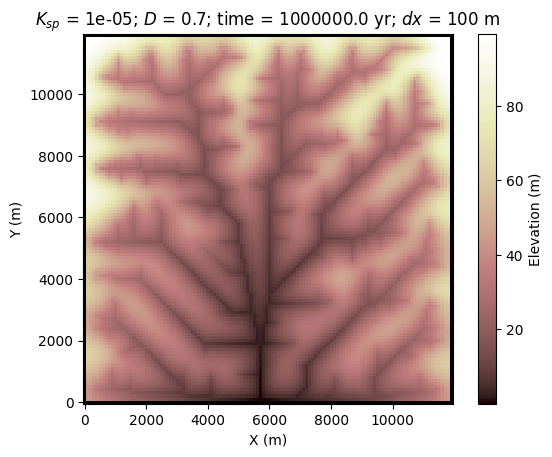

Maximum elevation is: 99.24880086293007


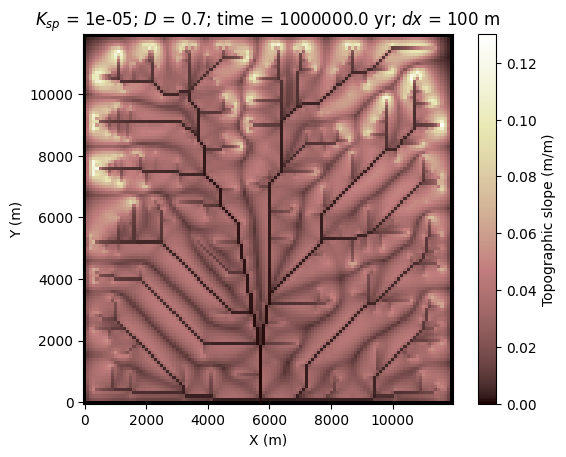

Mean slope is: 0.03370537222267444


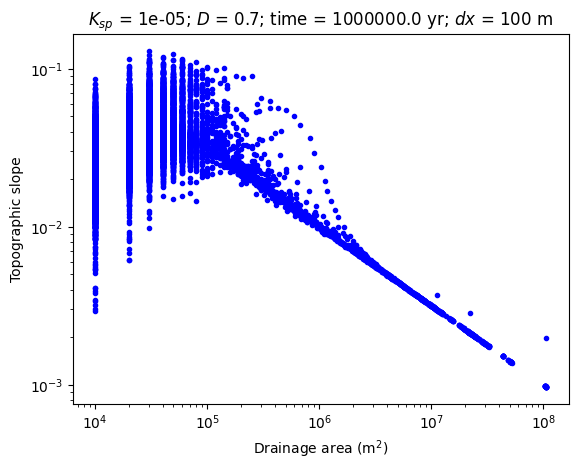

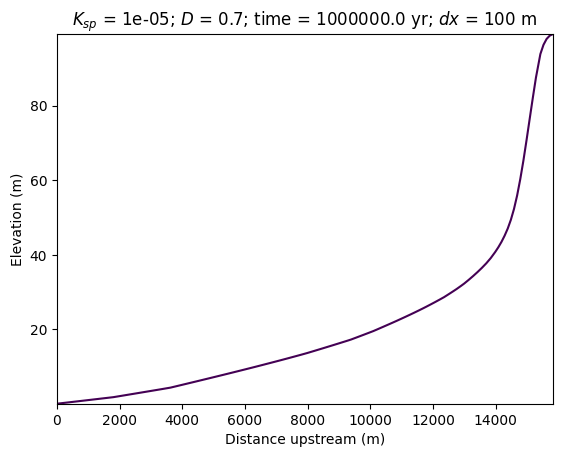

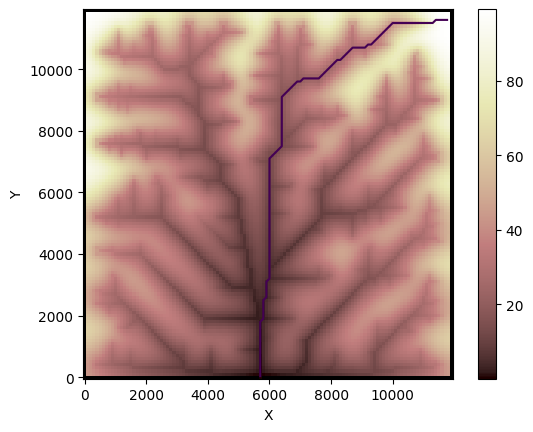

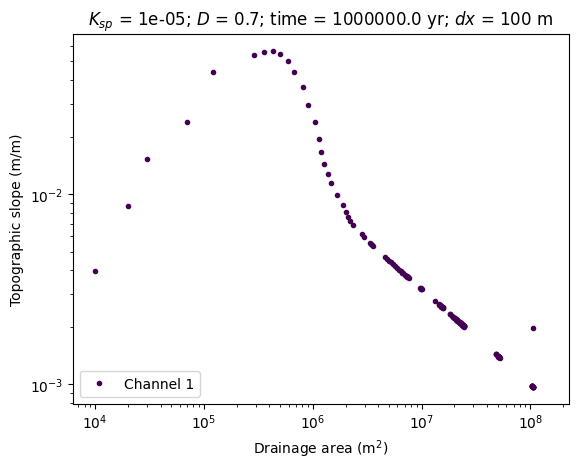

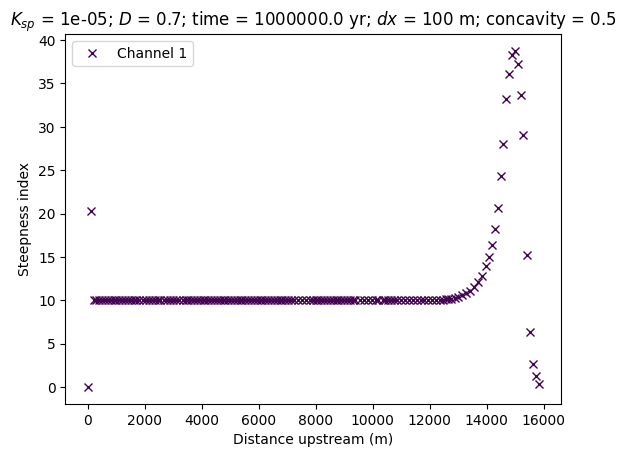

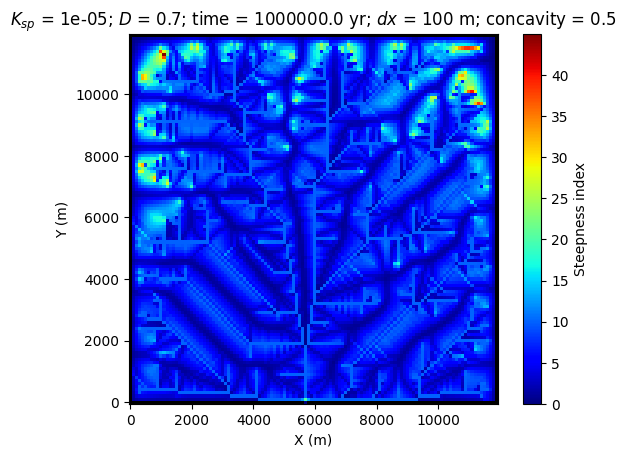

Diffusivity used: 0.7 m²/yr
Average slope: 0.0337
Total relief: 99.25 m
Mean channel steepness index: 6.67
Critical drainage area is 430000.0 m2


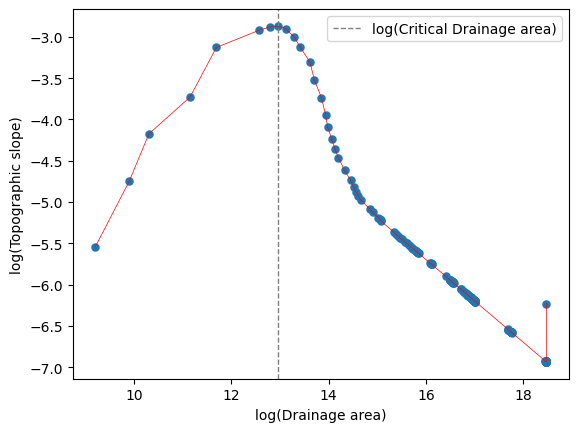

In [2]:
wrapper(D=0.7)

For D = 5


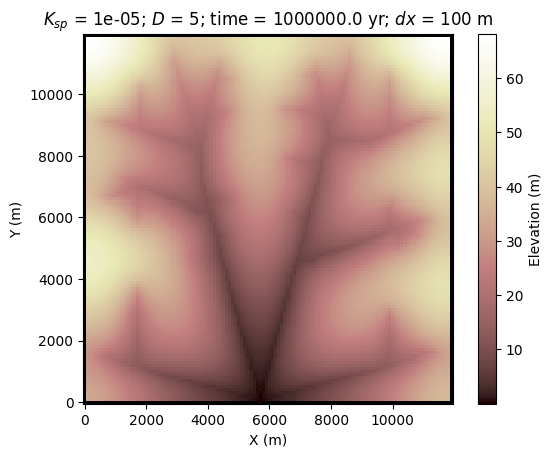

Maximum elevation is: 68.1098034576515


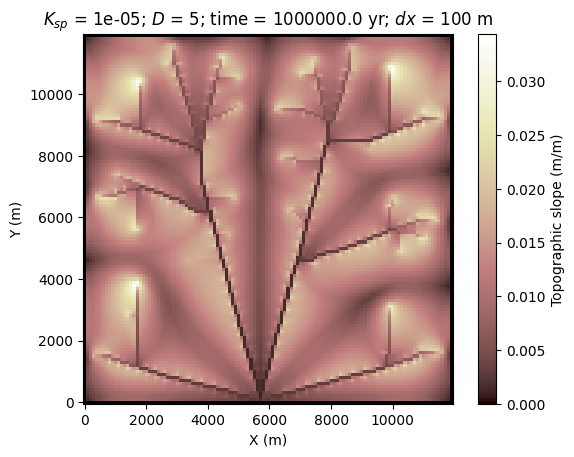

Mean slope is: 0.011723525079900902


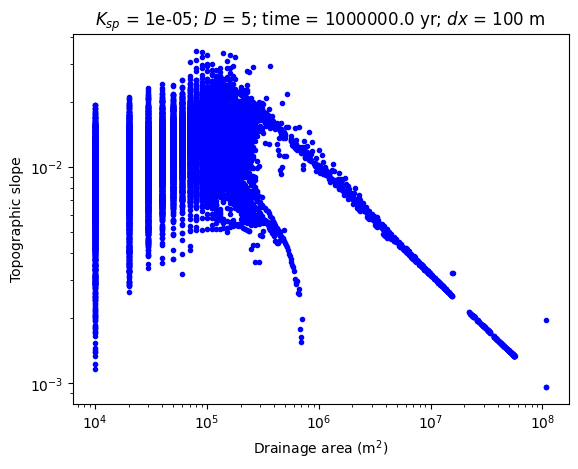

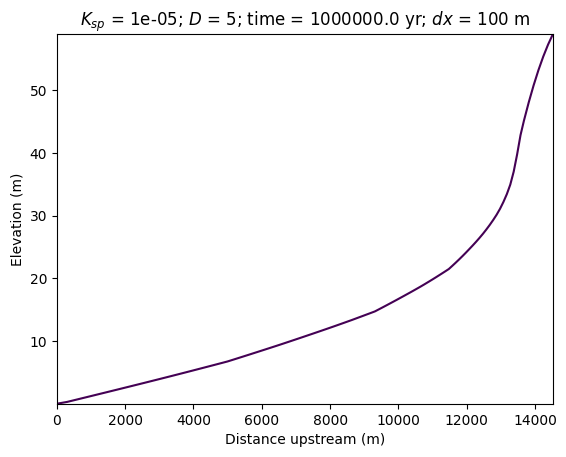

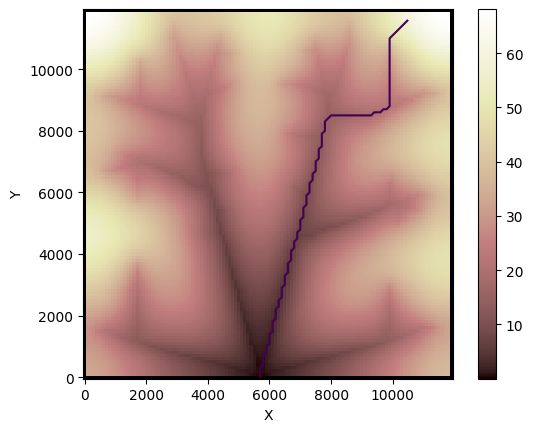

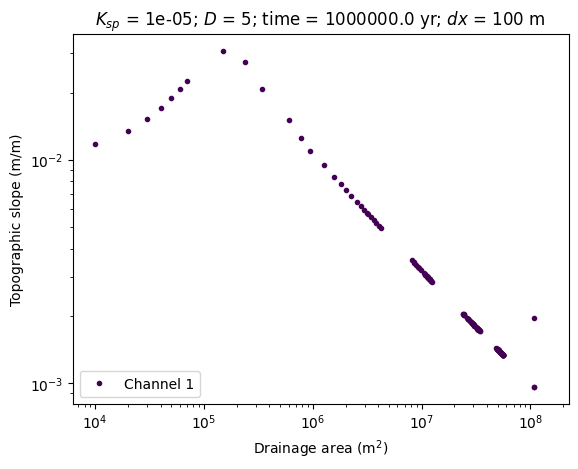

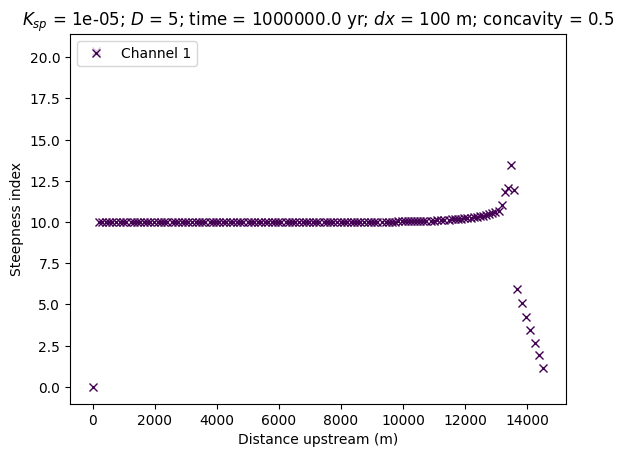

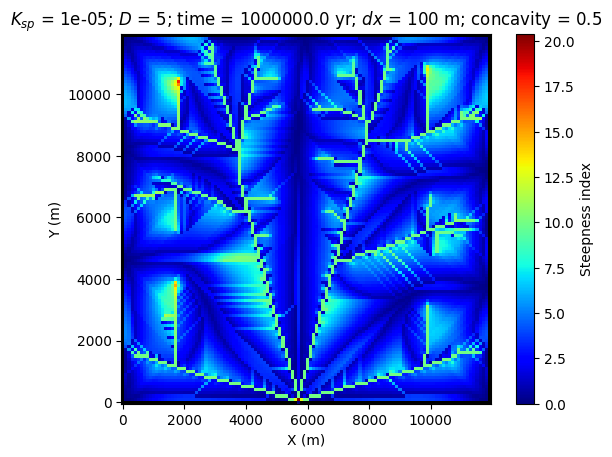

Diffusivity used: 5 m²/yr
Average slope: 0.0117
Total relief: 68.11 m
Mean channel steepness index: 3.51
Critical drainage area is 150000.0 m2


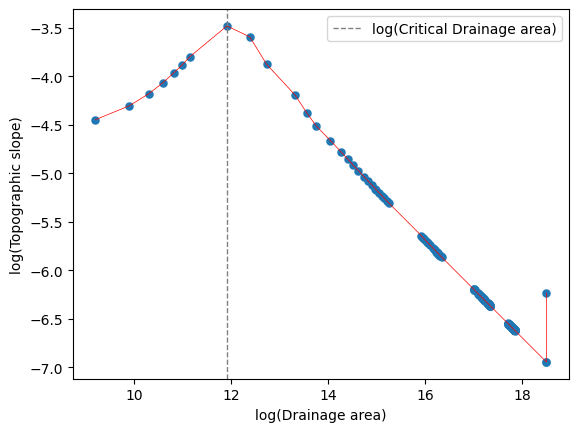

In [3]:
wrapper(D=5)

For D = 15


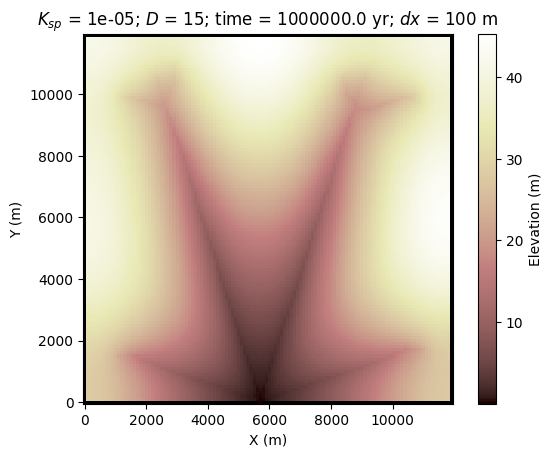

Maximum elevation is: 45.25038844762515


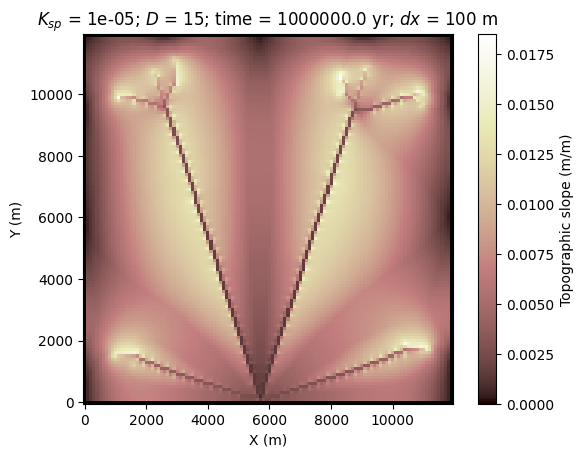

Mean slope is: 0.007266978446385263


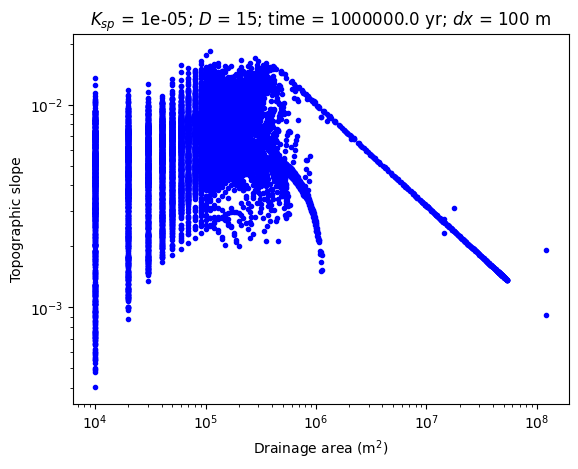

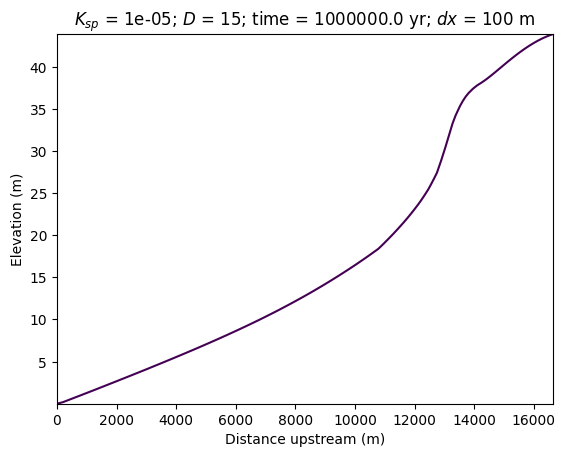

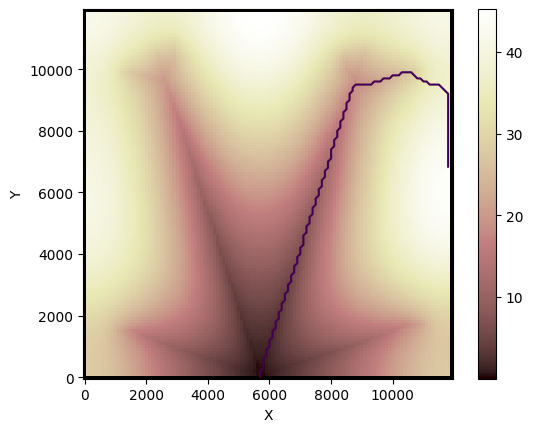

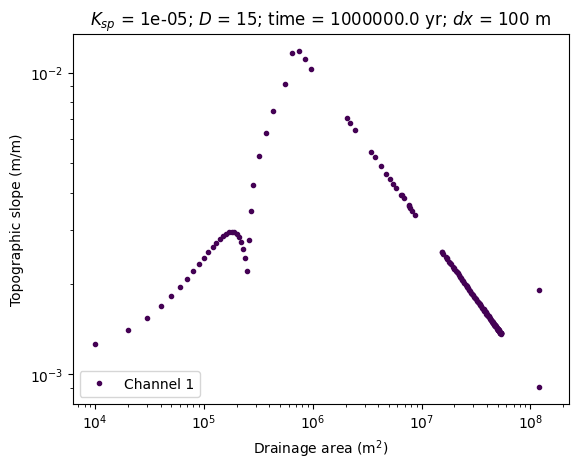

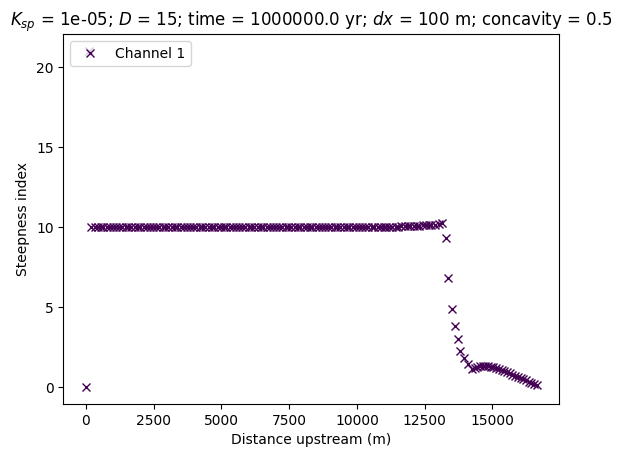

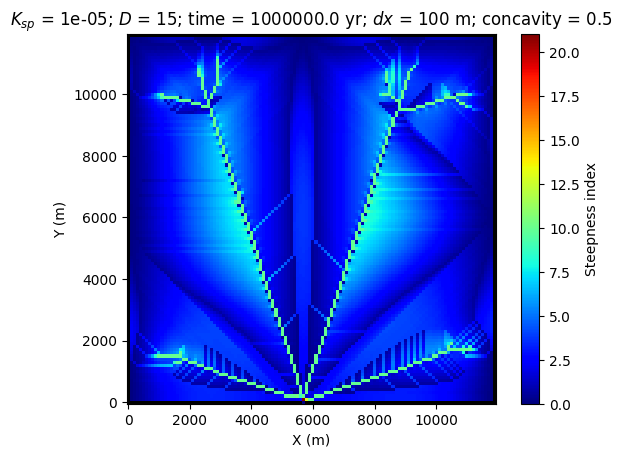

Diffusivity used: 15 m²/yr
Average slope: 0.0073
Total relief: 45.25 m
Mean channel steepness index: 2.91
Critical drainage area is 750000.0 m2


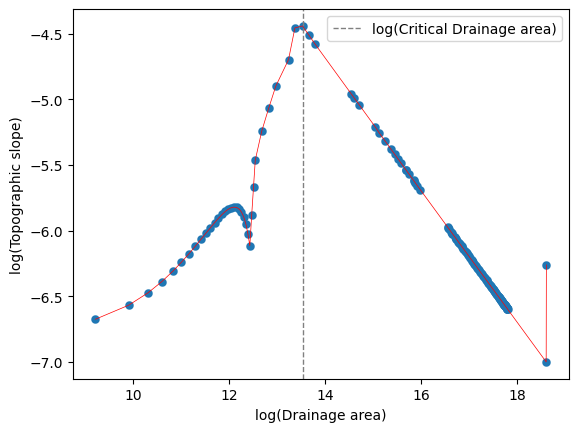

In [4]:
wrapper(D = 15)